In [1]:
import matplotlib
import numpy as np
import pandas as pd
from IPython.display import HTML, Latex, Markdown, display

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 400)
%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.4f" % x)

display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.max_colwidth = 100

After installation mutation works as a python package. It utilize dbnsfp_annotation library to generate features

In [2]:
import mutant

In [3]:
mutant.__version__

'1.0.2'

In [4]:
import dbnsfp_annotation

dbnsfp_annotation.__version__

'1.0.3'

In [5]:
from mutant.classifier import add_mutant_annotation

In [6]:
add_mutant_annotation.__annotations__

{'obj': typing.Union[pandas.core.frame.DataFrame, str],
 'file_type': typing.Literal['maf', 'vcf'],
 'genome_version': typing.Literal['hg19', 'hg38'],
 'path_to_database': str,
 'gene_base_path': str,
 'development_mode': bool,
 'dnp_convert_info': bool,
 'n_jobs': int,
 'model_path': str,
 'method': str,
 'annotated': bool,
 'return': pandas.core.frame.DataFrame}

In [7]:
maf = pd.read_csv("TCGA-A1-A0SB.maf", sep="\t")

In [8]:
from dbnsfp_annotation.utils import *

In [9]:
# Please state your database_path
DATABASE_PATH = "/path/to/dbNSFPv4.5a_custombuild.gz"
# Please state your gene_base_path
GENE_BASE_PATH = "/path/to/dbNSFP4.5_gene.complete.gz"

In [10]:
# Please state your MODEL_PATH. You can state AF or noAF version
MODEL_PATH = "v45a_academic_mutant.pickle"

In [11]:
maf

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,Exon_Number,t_depth,t_ref_count,t_alt_count,n_depth,n_ref_count,n_alt_count,all_effects,Allele,Gene,Feature,Feature_type,...,CANONICAL,CCDS,ENSP,SWISSPROT,TREMBL,UNIPARC,RefSeq,SIFT,PolyPhen,EXON,INTRON,DOMAINS,GMAF,AFR_MAF,AMR_MAF,ASN_MAF,EAS_MAF,EUR_MAF,SAS_MAF,AA_MAF,EA_MAF,CLIN_SIG,SOMATIC,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,IMPACT,PICK,VARIANT_CLASS,TSL,HGVS_OFFSET,PHENO,MINIMISED,ExAC_AF,ExAC_AF_AFR,ExAC_AF_AMR,ExAC_AF_EAS,ExAC_AF_FIN,ExAC_AF_NFE,ExAC_AF_OTH,ExAC_AF_SAS,GENE_PHENO,FILTER,COSMIC,CENTERS,CONTEXT,DBVS,NCALLERS
0,ABLIM1,0,.,GRCh37,chr10,116247760,116247760,+,Missense_Mutation,SNP,T,T,C,.,.,TCGA-A1-A0SB,TCGA-A1-A0SB-10B-01D-A142-09,T,T,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,c.998A>G,p.His333Arg,p.H333R,ENST00000277895,8/23,47,35,12,74,74,0,"ABLIM1,missense_variant,p.His273Arg,ENST00000533213,;ABLIM1,missense_variant,p.His333Arg,ENST000...",C,ENSG00000099204,ENST00000277895,Transcript,...,YES,CCDS7590.1,ENSP00000277895,ABLM1_HUMAN,.,UPI0000418D06,.,deleterious(0),probably_damaging(0.988),8/23,.,"PROSITE_profiles:PS50023,hmmpanther:PTHR24213:SF18,hmmpanther:PTHR24213,Gene3D:2.10.110.10,SMART...",.,.,.,.,.,.,.,.,.,.,"1,1,1",.,.,.,.,.,MODERATE,.,SNV,.,.,"1,1,1",.,.,.,.,.,.,.,.,.,.,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,CGGGATGCCAA,.,5
1,ADAMTS20,0,.,GRCh37,chr12,43944926,43944926,+,Missense_Mutation,SNP,T,T,C,.,.,TCGA-A1-A0SB,TCGA-A1-A0SB-10B-01D-A142-09,T,T,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,c.239A>G,p.Tyr80Cys,p.Y80C,ENST00000389420,2/39,34,18,15,50,50,0,"ADAMTS20,missense_variant,p.Tyr80Cys,ENST00000553158,;ADAMTS20,missense_variant,p.Tyr80Cys,ENST0...",C,ENSG00000173157,ENST00000389420,Transcript,...,YES,CCDS31778.2,ENSP00000374071,ATS20_HUMAN,.,UPI00004565F4,.,deleterious(0),probably_damaging(1),2/39,.,"hmmpanther:PTHR13723,hmmpanther:PTHR13723:SF165,Pfam_domain:PF01562",.,.,.,.,.,.,.,.,.,.,"1,1",.,.,.,.,.,MODERATE,.,SNV,.,.,"1,1",.,.,.,.,.,.,.,.,.,.,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,AGCGATAGTGG,.,5
2,KMT2D,0,.,GRCh37,chr12,49431403,49431404,+,Frame_Shift_Ins,INS,-,-,T,novel,.,TCGA-A1-A0SB,TCGA-A1-A0SB-10B-01D-A142-09,-,-,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,c.9735dupA,p.Pro3246ThrfsTer5,p.P3246Tfs*5,ENST00000301067,34/54,35,28,7,45,45,0,"KMT2D,frameshift_variant,p.Pro3246ThrfsTer5,ENST00000301067,;KMT2D,downstream_gene_variant,,ENST...",T,ENSG00000167548,ENST00000301067,Transcript,...,YES,CCDS44873.1,ENSP00000301067,KMT2D_HUMAN,"Q6PIA1_HUMAN,Q59FG6_HUMAN,F8VWW4_HUMAN",UPI0000EE84D6,.,.,.,34/54,.,"hmmpanther:PTHR22884,hmmpanther:PTHR22884:SF324",.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,HIGH,.,insertion,.,.,.,.,.,.,.,.,.,.,.,.,.,PASS,NONE,INDELOCATOR*|VARSCANI*|PINDEL,CAGGGGTAACT,.,3
3,SPTB,0,.,GRCh37,chr14,65266493,65266493,+,Missense_Mutation,SNP,T,T,C,.,.,TCGA-A1-A0SB,TCGA-A1-A0SB-10B-01D-A142-09,T,T,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,c.1036A>G,p.Thr346Ala,p.T346A,ENST00000389722,8/35,22,13,9,21,21,0,"SPTB,missense_variant,p.Thr346Ala,ENST00000389721,;SPTB,missense_variant,p.Thr346Ala,ENST0000055...",C,ENSG00000070182,ENST00000389722,Transcript,...,YES,CCDS32099.1,ENSP00000374372,SPTB1_HUMAN,"Q71VG2_HUMAN,Q71VG1_HUMAN,Q71VG0_HUMAN,Q71VF9_HUMAN,Q71VF8_HUMAN,Q59FP5_HUMAN,O14726_HUMAN,O1472...",UPI000053030D,.,tolerated(0.28),benign(0.173),8/35,.,"hmmpanther:PTHR11915:SF248,hmmpanther:PTHR11915,Gene3D:1.20.58.60,Pfam_domain:PF00435,SMART_doma...",.,.,.,.,.,.,.,.,.,.,"1,1",.,.,.,.,

In [12]:
%%time
mutant_annotated = add_mutant_annotation(
    obj=maf,
    file_type="maf",
    genome_version="hg19",
    path_to_database=DATABASE_PATH,
    gene_base_path=GENE_BASE_PATH,
    development_mode=True,
    dnp_convert_info=False,
    n_jobs=2,
    model_path=MODEL_PATH,
    method="predict_proba",
    annotated=False,
)

2025-03-25 15:39:12.513 | INFO     | dbnsfp_annotation.dbnsfp_annotation:annotate_maf_dbnsfp:54 - The quality of annotation improves if the following columns are present in maf file:                RS_ID (rs_dbsnp), ensembl transcript ID, HGVSp (any version) and HGVSc.
2025-03-25 15:39:14,850	INFO worker.py:1843 -- Started a local Ray instance. View the dashboard at http://10.250.107.51:8265 


CPU times: user 2.43 s, sys: 243 ms, total: 2.67 s
Wall time: 9.71 s


In [13]:
mutant_annotated.shape

(19, 920)

In [14]:
mutant_annotated["MutAnt_feature_availability"].value_counts()

MutAnt_feature_availability
tools                 9
no info               7
frequencies, tools    3
Name: count, dtype: int64

In [15]:
mutant_annotated

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,Exon_Number,t_depth,t_ref_count,t_alt_count,n_depth,n_ref_count,n_alt_count,all_effects,Allele,Gene,Feature,Feature_type,...,ExAC_pRec,ExAC_pNull,ExAC_nonTCGA_pLI,ExAC_nonTCGA_pRec,ExAC_nonTCGA_pNull,ExAC_nonpsych_pLI,ExAC_nonpsych_pRec,ExAC_nonpsych_pNull,gnomAD_pLI,gnomAD_pRec,gnomAD_pNull,ExAC_del.score,ExAC_dup.score,ExAC_cnv.score,ExAC_cnv_flag,GDI,GDI-Phred,Gene damage prediction (all disease-causing genes),Gene damage prediction (all Mendelian disease-causing genes),Gene damage prediction (Mendelian AD disease-causing genes),Gene damage prediction (Mendelian AR disease-causing genes),Gene damage prediction (all PID disease-causing genes),Gene damage prediction (PID AD disease-causing genes),Gene damage prediction (PID AR disease-causing genes),Gene damage prediction (all cancer disease-causing genes),Gene damage prediction (cancer recessive disease-causing genes),Gene damage prediction (cancer dominant disease-causing genes),LoFtool_score,SORVA_LOF_MAF0.005_HetOrHom,SORVA_LOF_MAF0.005_HomOrCompoundHet,SORVA_LOF_MAF0.001_HetOrHom,SORVA_LOF_MAF0.001_HomOrCompoundHet,SORVA_LOForMissense_MAF0.005_HetOrHom,SORVA_LOForMissense_MAF0.005_HomOrCompoundHet,SORVA_LOForMissense_MAF0.001_HetOrHom,SORVA_LOForMissense_MAF0.001_HomOrCompoundHet,Essential_gene,Essential_gene_CRISPR,Essential_gene_CRISPR2,Essential_gene_gene-trap,Gene_indispensability_score,Gene_indispensability_pred,MGI_mouse_gene,MGI_mouse_phenotype,ZFIN_zebrafish_gene,ZFIN_zebrafish_structure,ZFIN_zebrafish_phenotype_quality,ZFIN_zebrafish_phenotype_tag,MutAnt_score,MutAnt_feature_availability
0,ADSS,0,None,GRCh38,chr1,244420275,244420275,+,Missense_Mutation,SNP,G,G,T,novel,None,TCGA-A1-A0SB,TCGA-A1-A0SB-10B-01D-A142-09,G,G,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,c.685C>A,p.Pro229Thr,p.P229T,ENST00000366535,8/13,39,36,3,80,80,0,"ADSS,missense_variant,p.Pro229Thr,ENST00000366535,;ADSS,non_coding_transcript_exon_variant,,ENST...",T,ENSG00000035687,ENST00000366535,Transcript,...,0.177095097669272,3.46745911860389e-05,0.733112031429444,0.266777153568525,0.000110815002031051,0.714204575631973,0.285629400182865,0.000166024185162106,3.6264e-01,6.3734e-01,1.9149e-05,0.901725675935644,0.427198861749265,0.747485019355106,N,99.3475,2.15777,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,3.65E-01,0.0000,0.0000,0.0000,0.0000,0.0048,0.0000,0.0048,0.0000,None,E,S,E,0.954791819295224,E,Adss,None,adssl,trunk,necrotic,abnormal,0.9227,tools
1,SLC6A9,0,None,GRCh38,chr1,44010770,44010770,+,Missense_Mutation,SNP,C,C,T,None,None,TCGA-A1-A0SB,TCGA-A1-A0SB-10B-01D-A142-09,C,C,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,c.362G>A,p.Gly121Asp,p.G121D,ENST00000360584,3/14,60,43,17,70,70,0,"SLC6A9,missense_variant,p.Gly67Asp,ENST00000357730,;SLC6A9,missense_variant,p.Gly48Asp,ENST00000...",T,ENSG00000196517,ENST00000360584,Transcript,...,0.955512482401763,0.000234477010156261,0.38704712096522,0.61286678890589,8.60901288902071e-05,0.0199596023687268,0.979088573228516,0.000951824402757548,1.0618e-01,8.9257e-01,1.2540e-03,1.23881169306854,0.73037708167078,1.07927077360882,N,90.55117,2.04822,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,5.67E-01,0.0012,0.0000,0.0012,0.0000,0.0587,0.0032,0.0204,0.0008,E,N,N,H,0.860167521807743,E,Slc6a9,homeostasis/metabolism phenotype; muscle pheno

<Axes: >

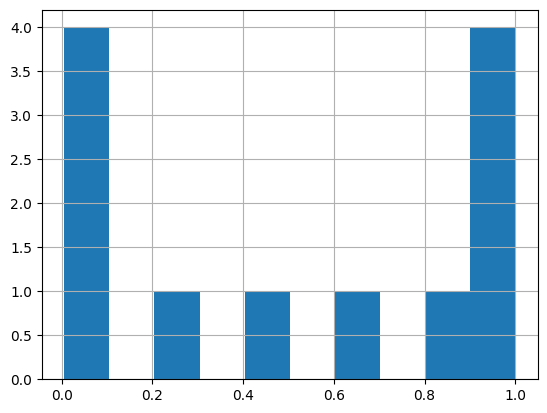

In [16]:
mutant_annotated["MutAnt_score"].hist()

Mutation with a MutAnt_score >0.5 considered as pathogenic

In [17]:
mutant_annotated["MutAnt_score"]

0    0.9227
1    0.9999
2    0.9995
3    0.9913
4       NaN
5    0.0706
6    0.0163
7       NaN
8    0.4887
9    0.2790
10   0.0091
11      NaN
12      NaN
13      NaN
14   0.8572
15   0.0055
16      NaN
17   0.6329
18      NaN
Name: MutAnt_score, dtype: float64

In [18]:
mutant_annotated["rs_dbSNP"]

0             None
1             None
2             None
3     rs1943508663
4              NaN
5             None
6             None
7              NaN
8             None
9     rs1230449080
10     rs776130394
11             NaN
12             NaN
13             NaN
14            None
15     rs372948404
16             NaN
17            None
18             NaN
Name: rs_dbSNP, dtype: object

In [19]:
# annotated maf saved so you can load and examine it
mutant_annotated.to_csv("example_annotated_maf.csv")